# Heart Failure Prediction
## Project Objective
<br>
- Preliminary Data Analysis. Explore the dataset and extract basic observations of the data
<br>
- Use the furnished data to predict which patients will die caused by heart failure

## Context: 


Import packages

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings 
import warnings
warnings.filterwarnings(action = 'ignore')

Load data and display sample

In [2]:
# Importing data
dataset = pd.read_csv(r'C:\Users\OEM\Desktop\heart_failure_clinical_records_dataset.csv')
# Display 10 samples
dataset.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
127,58.0,1,200,1,60,0,300000.00,0.80,137,0,0,104,0
275,45.0,0,582,0,38,1,422000.00,0.80,137,0,0,245,0
90,70.0,0,66,1,45,0,249000.00,0.80,136,1,1,80,0
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
39,60.0,0,235,1,38,0,329000.00,3.00,142,0,0,30,1
277,70.0,0,582,1,38,0,25100.00,1.10,140,1,0,246,0
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
255,52.0,1,191,1,30,1,334000.00,1.00,142,1,1,216,0
168,65.0,0,582,1,40,0,270000.00,1.00,138,0,0,140,0


Check the structure of data

In [3]:
# Check dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Observation:
<br>
1. The Heart Failure Prediction dataset contains 13 features.
2. Each feature contains 299 entries
3. There is no null values.
4. All the features are numerical.

Finding duplicate

In [4]:
dataset.duplicated().sum()

0

Finding missing value(NaN)

In [5]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Checking quantitative data stats

In [6]:
# Check the distribution of the numerical data
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Observation:
1. Mean of age is about 61 years old, and patients' age concentrate between 51 and 70.
2. Mean of the creatinine_phosphokinase is around 582, with IQR ranging betweem 116.5 and 582.
3. 

Check skew of quantitative variables

In [7]:
# Check skew
dataset.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

Investigation of distribution

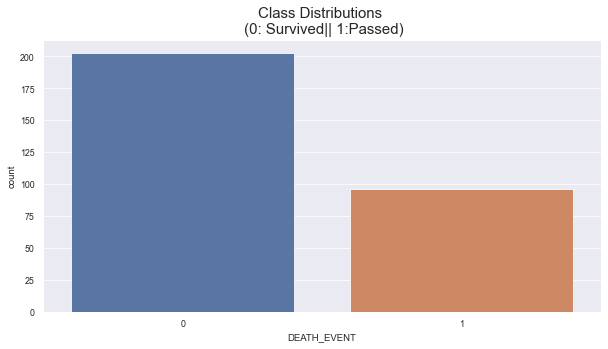

In [19]:
# Checking labels distributions

plt.figure(figsize = (10, 5))
sns.countplot(dataset['DEATH_EVENT'])
plt.title('Class Distributions \n (0: Survived|| 1:Passed)', fontsize = 15)
plt.show()

It is clearly to see that we are facing imbalanced dataset with the ratio of 2:1

Scatter plot

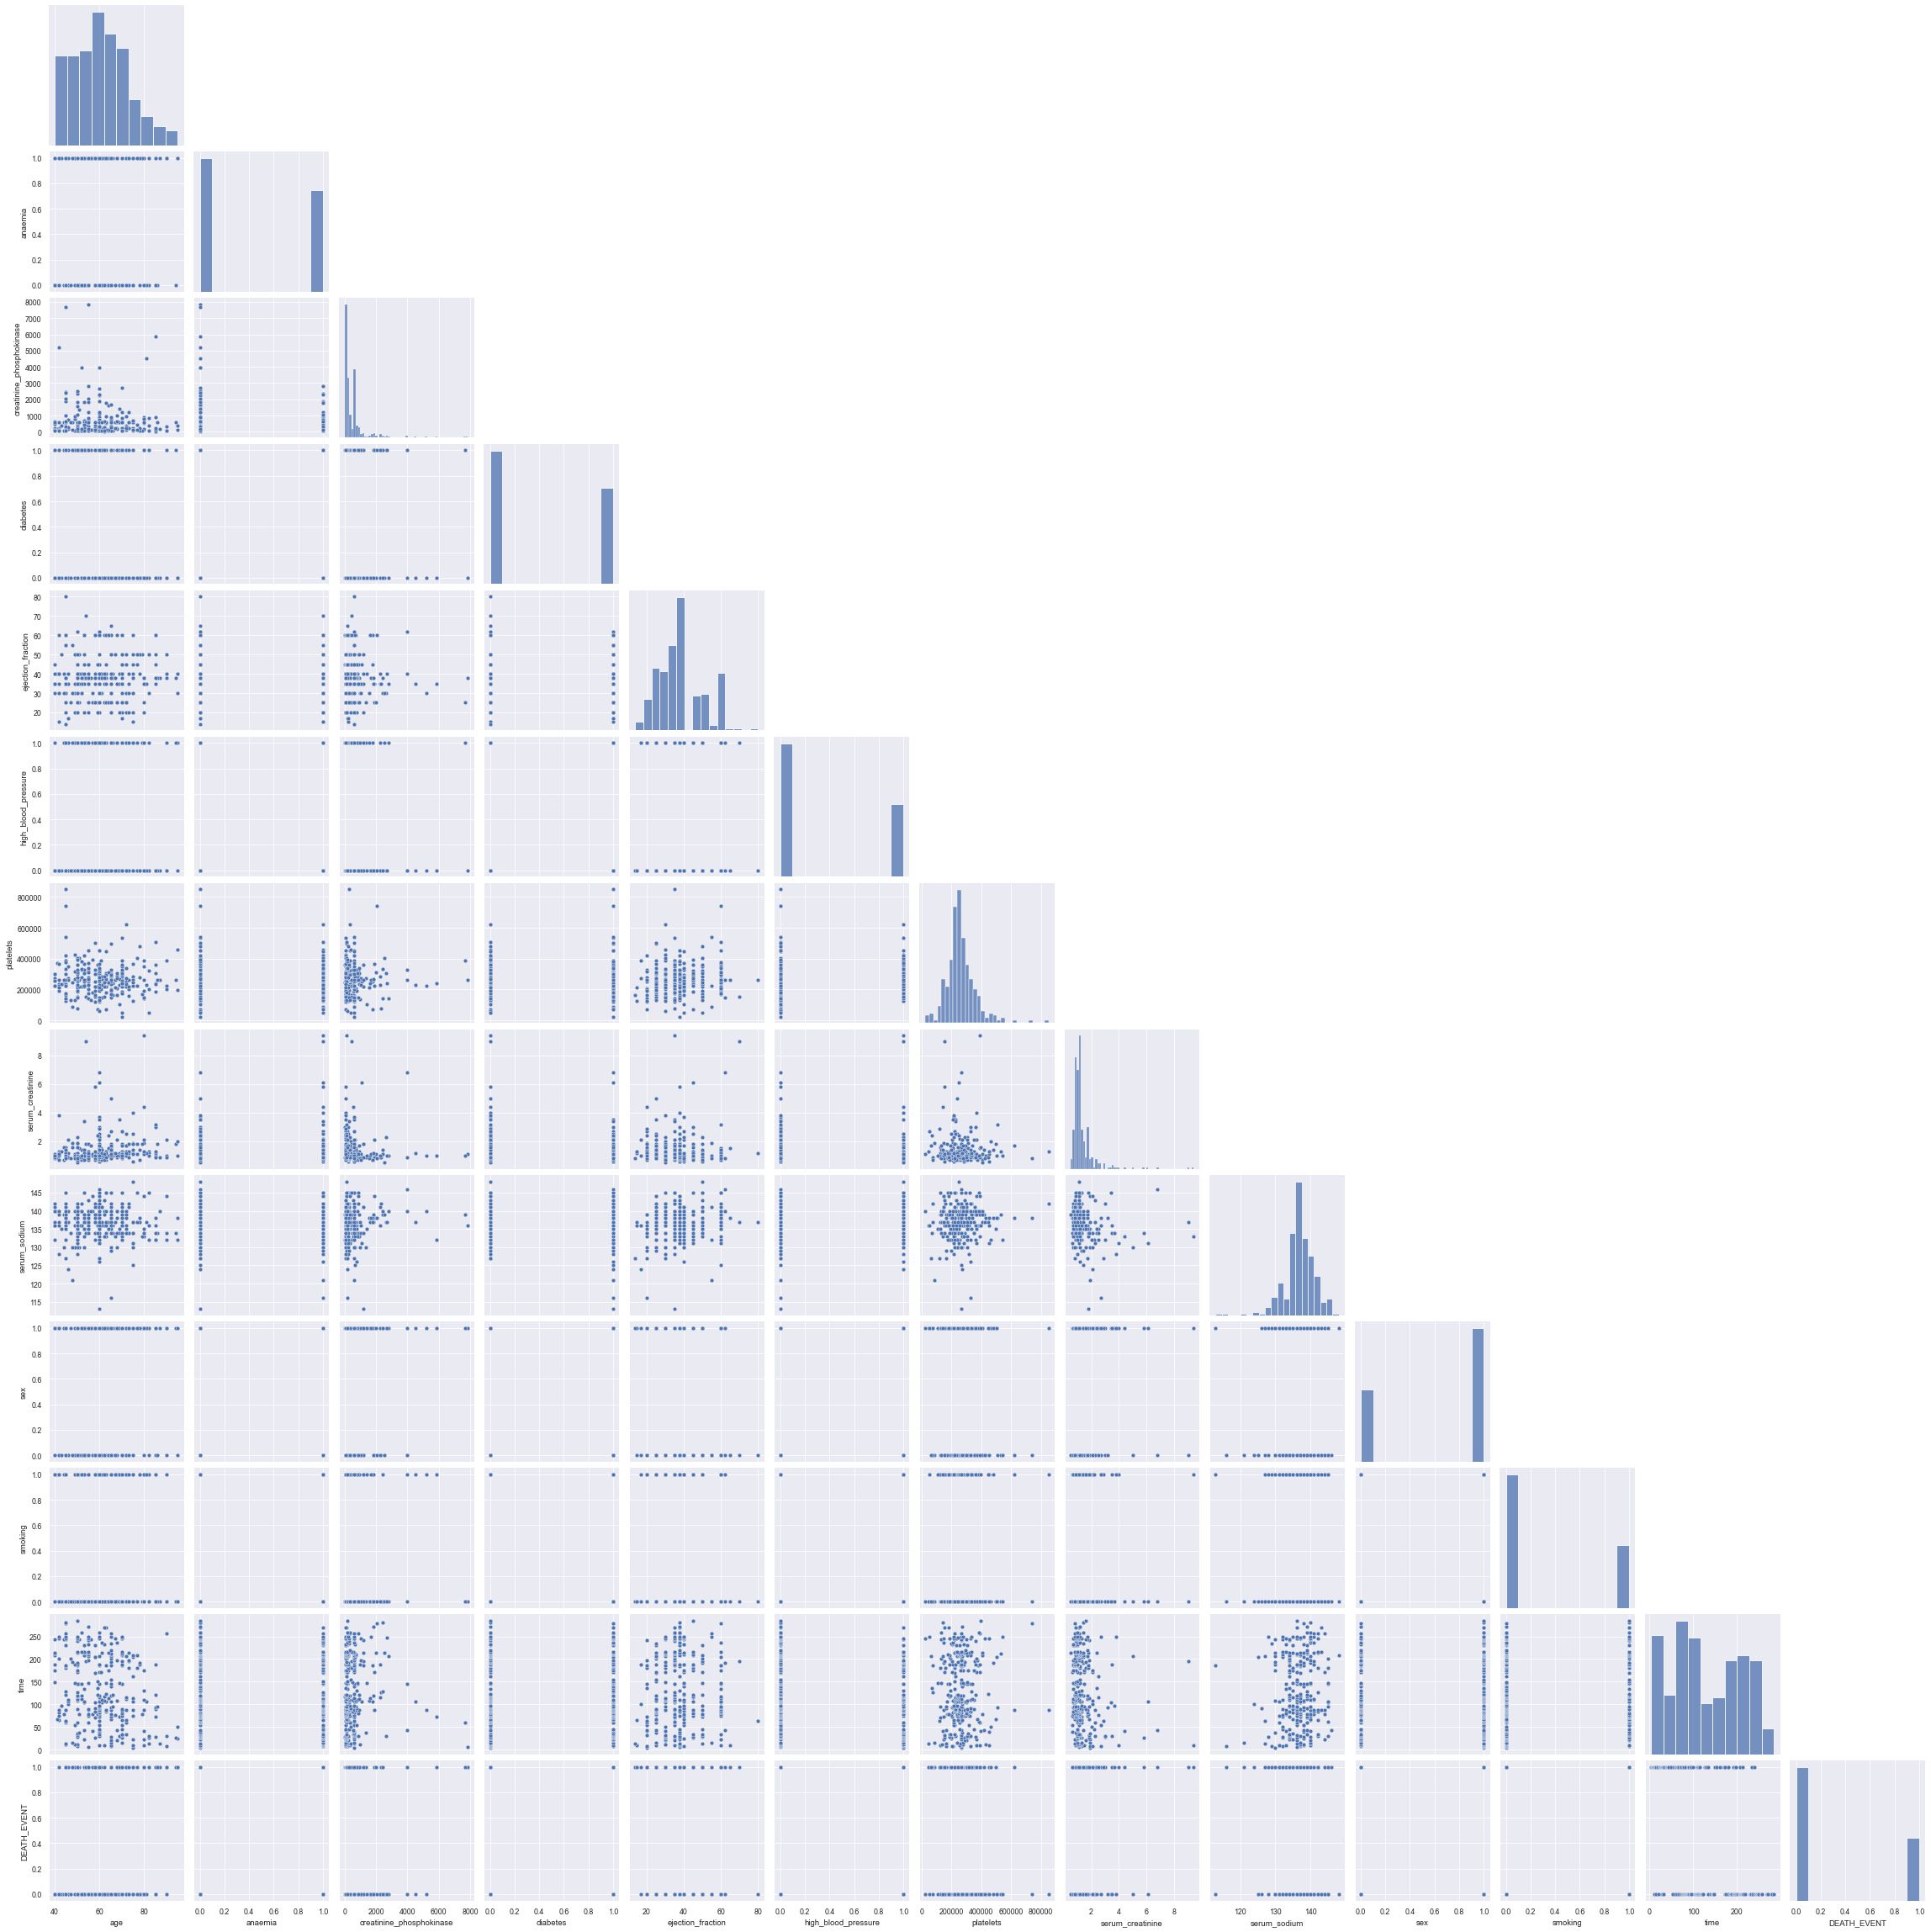

In [20]:
sns.pairplot(dataset, corner = True)

The pairplot show us the histograms of each numerical variable and scatter plots representing their correlations. From the scatter plot above, we can observed that our data do not seem to be normally distributed. Besides that, there is no clear positive or negative correlations are visible.

Correlation matrix heatmap

In [ ]:
fig, ax = plt.subplots(fig_size = (13, 10))

